In [1]:
# %matplotlib qt

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from knn import KNN
from findingNemo import FindingNemo
from sklearn.neighbors import KNeighborsClassifier

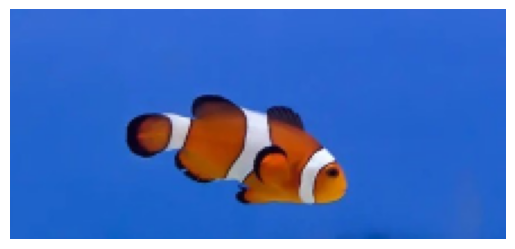

In [3]:
nemo = cv2.imread('input/nemo7.jpg')
nemo = cv2.resize(nemo, (0,0), fx=.5, fy=.5)
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.axis('off')
plt.show()

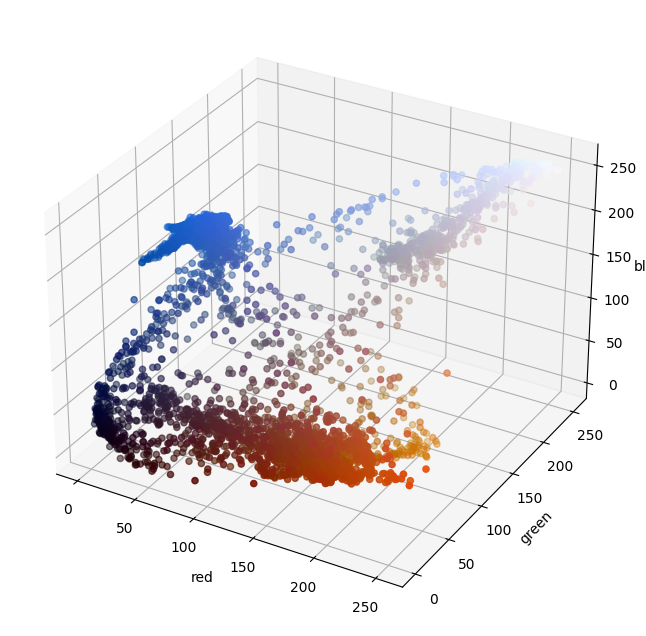

In [4]:
pixels_list_rgb = nemo.reshape(-1, 3)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')
ax.scatter(pixels_list_rgb[:,0], pixels_list_rgb[:,1], pixels_list_rgb[:,2], c=pixels_list_rgb/255)
plt.show()

In [5]:
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
pixels_list_hsv = nemo_hsv.reshape(-1, 3)

# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(projection='3d')

# ax.scatter(pixels_list_hsv[:,0], pixels_list_hsv[:,1], pixels_list_hsv[:,2], c=pixels_list_rgb/255)
# ax.set_xlabel('H')
# ax.set_ylabel('S')
# ax.set_zlabel('V')
# plt.show()

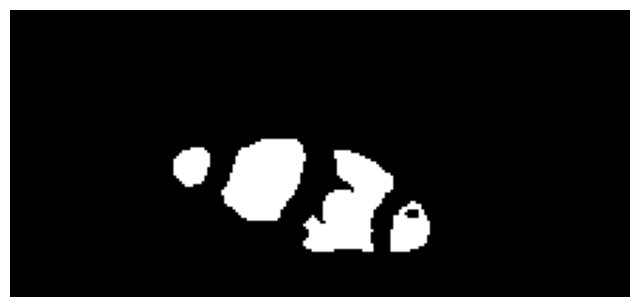

In [6]:
light_orange = (1, 100, 100)
dark_orange = (60, 255, 255)


plt.figure(figsize=(8,8))
mask_orange = cv2.inRange(nemo_hsv, light_orange, dark_orange)
plt.imshow(mask_orange, cmap='gray')
plt.axis('off')
plt.show()

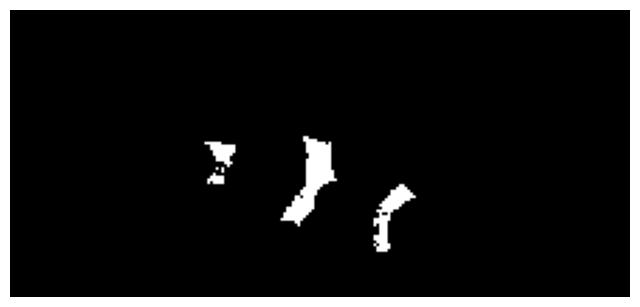

In [7]:
light_white = (0, 0, 150)
dark_white = (145, 60, 255)

plt.figure(figsize=(8,8))
mask_white = cv2.inRange(nemo_hsv, light_white, dark_white)
plt.imshow(mask_white, cmap='gray')
plt.axis('off')
plt.show()

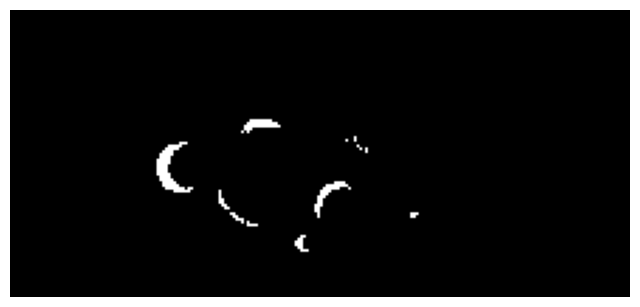

In [8]:
light_black = (0, 0, 0)
dark_black = (255, 255, 50)

plt.figure(figsize=(8,8))
mask_black = cv2.inRange(nemo_hsv, light_black, dark_black)
plt.imshow(mask_black, cmap='gray')
plt.axis('off')
plt.show()

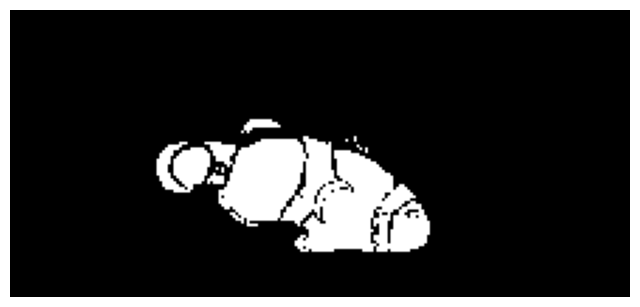

In [9]:
final_mask = mask_orange + mask_white + mask_black

plt.figure(figsize=(8,8))
plt.imshow(final_mask, cmap='gray')
plt.axis('off')
plt.show()

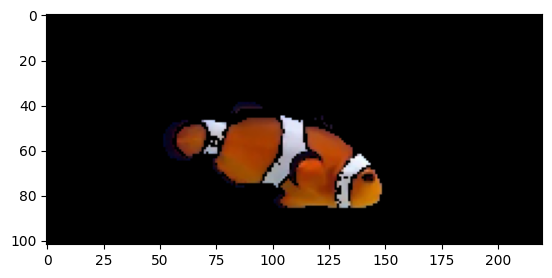

In [10]:
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.imshow(final_result)
plt.show()

In [11]:
X_train = pixels_list_hsv / 255
X_train.shape

(22440, 3)

In [12]:
Y_train = final_mask.reshape(-1,) // 255
Y_train.shape

(22440,)

In [13]:
Y_train[20000:20100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

# KNN

In [14]:
knn = KNN(k=3)
knn.fit(X_train, Y_train)

In [15]:
new_pixel = np.array([100, 100, 0]) / 255
knn.predict([new_pixel])

array([1], dtype=int64)

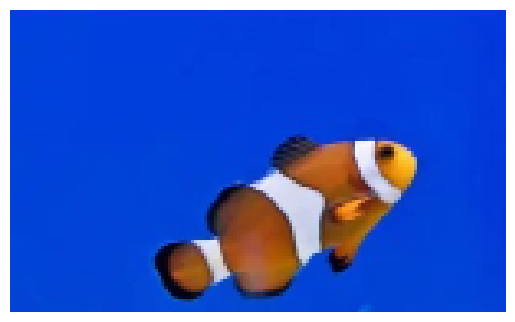

In [16]:
test_image = cv2.imread('input/nemo9.jpg')
test_image = cv2.resize(test_image, (0,0), fx=.5, fy=.5)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.axis('off')
plt.show()

In [17]:
dashe_nemo_hsv = cv2.cvtColor(test_image, cv2.COLOR_RGB2HSV)
X_test = dashe_nemo_hsv.reshape(-1, 3) / 255

In [18]:
Y_pred = knn.predict(X_test)

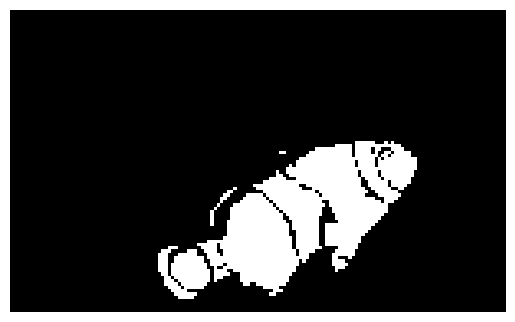

In [19]:
output = Y_pred.reshape(test_image.shape[:2])
plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()

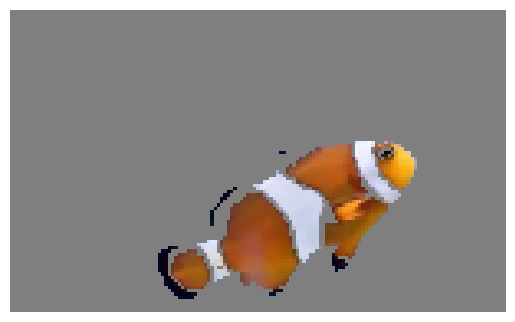

In [20]:
output = output.astype('uint8')
final_result = cv2.bitwise_and(test_image, test_image, mask= output)
background = np.ones(final_result.shape[:2])* (1 - output)
back3 = np.ones(final_result.shape)
back3[:,:,0] = background * 127
back3[:,:,1] = background * 127
back3[:,:,2] = background * 127
final_result += back3.astype('uint8')
plt.imshow(final_result)
plt.axis('off')
plt.show()

## class

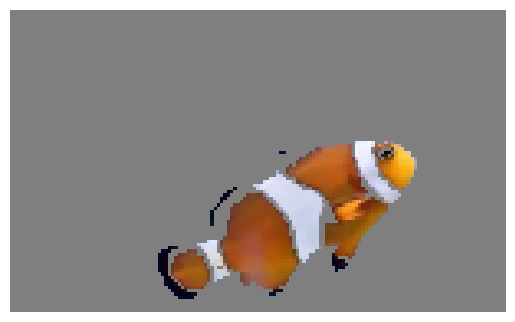

In [21]:
findingNemo = FindingNemo(nemo)
final_result = findingNemo.remove_background(test_image, (127, 127, 127))
plt.imshow(final_result)
plt.axis('off')
plt.show()